In [1]:
%load_ext rpy2.ipython
%R require(ggplot2)
%matplotlib inline

/Users/aug/.pyenv/versions/jupyter3/lib/python3.6/site-packages/rpy2/rinterface/__init__.py:145: RRuntimeWarning: Loading required package: ggplot2

  warnings.warn(x, RRuntimeWarning)


In [2]:
import matplotlib.pyplot as plt
from matplotlib import pyplot
import numpy as np
import pylab as plb
from scipy import stats
import pandas as pd

In [10]:
df = pd.read_table('dna_sp_out.out', engine='python', skipfooter=3)

In [11]:
df = df[~df['Datafile'].str.contains('_final_final.fas')]

In [12]:
df['sRNA'] = df['Datafile'].apply(lambda x: x.split('_cmaligned')[0])

In [13]:
df

,Datafile,Region,Ingroup,Outgroup,n,Sites,NetSites,S,Eta,Hap,...,G+Gc,G+Ctot,TajimaD,SigD,FuLiD*,SigD.1,FuLiF*,SigF,FuFs,sRNA
0,C0465_rf_cmaligned_no_dots_final.fas,1-78,29,0,29,78,76,2,2,3,...,0.0,0.4750,-1.2488,n.s.,-0.7262,n.s.,-1.0080,n.s.,-1.628,C0465_rf
2,Esr1_EC_cmaligned_no_dots_final.fas,1-234,29,0,29,234,234,14,15,9,...,0.0,0.3497,-0.4062,n.s.,-1.1856,n.s.,-1.1047,n.s.,-0.363,Esr1_EC
4,Esr2_EC_cmaligned_no_dots_final.fas,1-185,29,0,29,185,185,14,14,10,...,0.0,0.4453,-0.3468,n.s.,-1.3610,n.s.,-1.2249,n.s.,-1.305,Esr2_EC
6,Esr4_EC_cmaligned_no_dots_final.fas,1-236,29,0,29,236,235,11,11,9,...,0.0,0.3683,-1.6571,#,-2.5296,*,-2.6453,*,-3.885,Esr4_EC
8,Esr5_EC_cmaligned_no_dots_final.fas,1-156,29,0,29,156,146,4,4,4,...,0.0,0.4487,-0.8242,n.s.,-1.9579,n.s.,-1.8890,n.s.,-0.490,Esr5_EC
10,Esr6_EC_cmaligned_no_dots_final.fas,1-106,29,0,29,106,106,7,7,7,...,0.0,0.4548,-0.7808,n.s.,-0.7972,n.s.,-0.9234,n.s.,-1.847,Esr6_EC
12,Esr8_EC_cmaligned_no_dots_final.fas,1-144,29,0,29,144,144,1,1,2,...,0.0,0.4988,0.2533,n.s.,0.5985,n.s.,0.5791,n.s.,0.694,Esr8_EC
14,Esr9_EC_cmaligned_no_dots_final.fas,1-71,29,0,29,71,71,2,2,3,...,0.0,0.4327,0.9733,n.s.,0.8106,n.s.,0.9885,n.s.,0.886,Esr9_EC
16,P26_rf_cmaligned_no_dots_final.fas,1-62,29,0,29,62,62,0,0,1,...,0.0,0.5323,n.a.,n.a.,n.a.,n.a.,n.a.,n.a.,n.a.,P26_rf
18,STnc130_rf_cmaligned_no_dots_final.fas,1-126,29,0,29,126,126,4,4,6,...,0.0,0.3700,-0.5735,n.s.,0.0553,n.s.,-0.1479,n.s.,-2.413,STnc130_rf


In [14]:
df.set_index('sRNA', inplace=True)

In [15]:
%store -r sdf

In [17]:
sdf.set_index('name', inplace=True)

In [30]:
%store -r summary

In [32]:
summary

,blast_gain_node,blast_age_bin,rfam_gain_node,rfam_age_bin
name,,,,
C0465_rf,24.0,baby,24.0,baby
Esr1_EC,25.0,baby,7.0,teenage
Esr2_EC,25.0,baby,6.0,teenage
Esr4_EC,8.0,teenage,6.0,teenage
Esr5_EC,25.0,baby,25.0,baby
Esr6_EC,6.0,old,6.0,teenage
Esr8_EC,2.0,old,2.0,old
Esr9_EC,6.0,old,6.0,teenage
OrzO-P_rf,24.0,baby,24.0,baby


In [34]:
old = df.join(summary[['blast_age_bin', 'rfam_age_bin']])

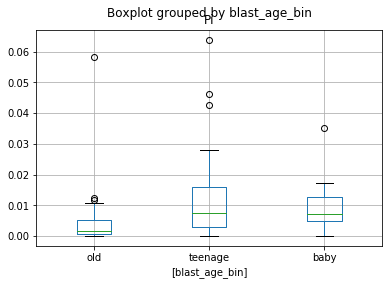

In [36]:
old[['Pi', 'blast_age_bin']].drop('STnc4180_ST').boxplot(by='blast_age_bin')

### New age bins (expand baby)

In [20]:
df = df.join(sdf)

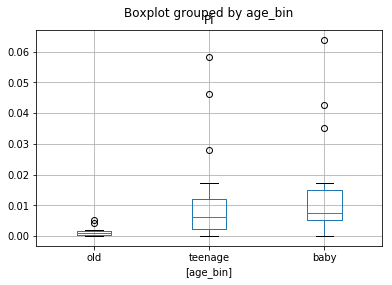

In [29]:
df[['Pi', 'age_bin']].drop('STnc4180_ST').boxplot(by='age_bin')

In [22]:
df['gap_sites'] = df['Sites'] - df['NetSites']

In [23]:
df

,Datafile,Region,Ingroup,Outgroup,n,Sites,NetSites,S,Eta,Hap,...,TajimaD,SigD,FuLiD*,SigD.1,FuLiF*,SigF,FuFs,gain_node,age_bin,gap_sites
sRNA,,,,,,,,,,,,,,,,,,,,,
C0465_rf,C0465_rf_cmaligned_no_dots_final.fas,1-78,29,0,29,78,76,2,2,3,...,-1.2488,n.s.,-0.7262,n.s.,-1.0080,n.s.,-1.628,24.0,baby,2
Esr1_EC,Esr1_EC_cmaligned_no_dots_final.fas,1-234,29,0,29,234,234,14,15,9,...,-0.4062,n.s.,-1.1856,n.s.,-1.1047,n.s.,-0.363,25.0,baby,0
Esr2_EC,Esr2_EC_cmaligned_no_dots_final.fas,1-185,29,0,29,185,185,14,14,10,...,-0.3468,n.s.,-1.3610,n.s.,-1.2249,n.s.,-1.305,25.0,baby,0
Esr4_EC,Esr4_EC_cmaligned_no_dots_final.fas,1-236,29,0,29,236,235,11,11,9,...,-1.6571,#,-2.5296,*,-2.6453,*,-3.885,8.0,baby,1
Esr5_EC,Esr5_EC_cmaligned_no_dots_final.fas,1-156,29,0,29,156,146,4,4,4,...,-0.8242,n.s.,-1.9579,n.s.,-1.8890,n.s.,-0.490,25.0,baby,10
Esr6_EC,Esr6_EC_cmaligned_no_dots_final.fas,1-106,29,0,29,106,106,7,7,7,...,-0.7808,n.s.,-0.7972,n.s.,-0.9234,n.s.,-1.847,6.0,teenage,0
Esr8_EC,Esr8_EC_cmaligned_no_dots_final.fas,1-144,29,0,29,144,144,1,1,2,...,0.2533,n.s.,0.5985,n.s.,0.5791,n.s.,0.694,2.0,old,0
Esr9_EC,Esr9_EC_cmaligned_no_dots_final.fas,1-71,29,0,29,71,71,2,2,3,...,0.9733,n.s.,0.8106,n.s.,0.9885,n.s.,0.886,6.0,teenage,0
P26_rf,P26_rf_cmaligned_no_dots_final.fas,1-62,29,0,29,62,62,0,0,1,...,n.a.,n.a.,n.a.,n.a.,n.a.,n.a.,n.a.,6.0,teenage,0


In [24]:
df['age_bin'].value_counts()

baby       23
teenage    23
old        17
Name: age_bin, dtype: int64

In [25]:
df['gaps_per_len'] = df['gap_sites']/df['Sites']

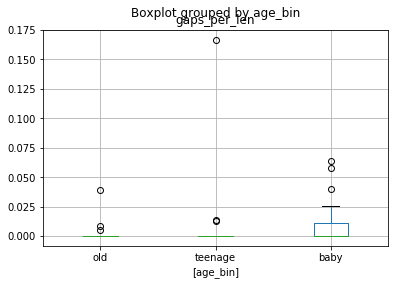

In [26]:
df[['gaps_per_len', 'age_bin']].boxplot(by='age_bin')

In [27]:
df['Pi']

sRNA
C0465_rf              0.002658
Esr1_EC               0.014368
Esr2_EC               0.017281
Esr4_EC               0.005827
Esr5_EC               0.004757
Esr6_EC               0.012408
Esr8_EC               0.002053
Esr9_EC               0.010546
P26_rf                0.000000
STnc130_rf            0.006294
STnc240_rf            0.007882
STnc3000_ST           0.017184
STnc3160_ST           0.010776
STnc3390_ST           0.015898
STnc4080_ST           0.010793
STnc410_rf            0.009509
STnc4180_ST           0.109718
STnc430_rf            0.046299
STnc480_rf            0.004926
STnc520_ST            0.063837
STnc880_ST            0.011823
Tpke11_EC_rf          0.008905
arcZ_EC_rf            0.002919
c0299_EC              0.007488
c0343_EC              0.012118
csrB_EC               0.007772
csrC_EC_rf            0.004887
cyaR_EC_rf            0.002406
ffs_EC                0.000711
fnrS_EC_rf            0.000000
                        ...   
glmZ_EC_rf            0.001190
isc

## Expression